### Load the train/test

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../data/" directory

import os
import os.path as osp

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ds_name = '02172021'
split_rs = '123'
ds_folder = f'../data/{ds_name}/split_rs{split_rs}'
for dirname, _, filenames in os.walk(ds_folder):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data/02172021/split_rs123/test.csv
../data/02172021/split_rs123/train.csv


In [2]:
#Import the files
train_df = pd.read_csv(f'{ds_folder}/train.csv')
test_df = pd.read_csv(f'{ds_folder}/test.csv')

/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2,3,4,16,19,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
test_df.tail()

,cluster_id,sim,state,dynamic,dynamic_model,v_sampling_fraction,v_cluster_size,v_timespan,gamma,oster,...,v_sampling_fraction-norm,v_cluster_size-norm,v_timespan-norm,oster-norm,birth_rate-norm,PD-norm,abs_growth_rate-norm,fraction_time_growth-norm,r_max-norm,cherries-norm
118163,Background,893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118164,Background,893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118165,Background,893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118166,Background,893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118167,Background,893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Remove the background nodes

In [4]:
train_df = train_df[train_df['cluster_id'] != 'Background']
test_df = test_df[test_df['cluster_id'] != 'Background']
print(f'Train: {train_df.shape}\nTest: {test_df.shape}')

Train: (74396, 47)
Test: (18628, 47)


In [5]:
test_df.tail()

,cluster_id,sim,state,dynamic,dynamic_model,v_sampling_fraction,v_cluster_size,v_timespan,gamma,oster,...,v_sampling_fraction-norm,v_cluster_size-norm,v_timespan-norm,oster-norm,birth_rate-norm,PD-norm,abs_growth_rate-norm,fraction_time_growth-norm,r_max-norm,cherries-norm
18623,c7,893,E,static,stable,0.882798,12.0,5.0,0.531162,5.068966,...,0.887591,-0.632966,-1.217582,-1.216423,-0.054812,-0.891082,-0.02868,-1.270158,0.024577,-2.473886
18624,c7,893,E,static,stable,0.882798,12.0,5.0,0.531162,5.068966,...,0.887591,-0.632966,-1.217582,-1.216423,-0.054812,-0.891082,-0.02868,-1.270158,0.024577,-2.473886
18625,c7,893,E,static,stable,0.882798,12.0,5.0,0.531162,5.068966,...,0.887591,-0.632966,-1.217582,-1.216423,-0.054812,-0.891082,-0.02868,-1.270158,0.024577,-2.473886
18626,c7,893,E,static,stable,0.882798,12.0,5.0,0.531162,5.068966,...,0.887591,-0.632966,-1.217582,-1.216423,-0.054812,-0.891082,-0.02868,-1.270158,0.024577,-2.473886
18627,c7,893,E,static,stable,0.882798,12.0,5.0,0.531162,5.068966,...,0.887591,-0.632966,-1.217582,-1.216423,-0.054812,-0.891082,-0.02868,-1.270158,0.024577,-2.473886


### Load the feature desciption

In [6]:
import json
js_f = osp.join('../aly/feat_dict.json')

with open(js_f, 'r') as f:
    feat_desc = json.load(f)

input_feat = feat_desc['norm_onehot_feats']
print(f'Inputs: {len(input_feat)}, {input_feat}')
label_feat = 'dynamic_cat'

Inputs: 21, ['v_sampling_fraction-norm', 'v_cluster_size-norm', 'v_timespan-norm', 'oster-norm', 'birth_rate-norm', 'PD-norm', 'abs_growth_rate-norm', 'fraction_time_growth-norm', 'r_max-norm', 'cherries-norm', 'ltt_shape_cat_0', 'ltt_shape_cat_1', 'ltt_shape_cat_2', 'ltt_shape_cat_3', 'R0_cat_0', 'R0_cat_1', 'R0_cat_2', 'gamma_cat_0', 'gamma_cat_1', 'gamma_cat_2', 'gamma_cat_3']


In [13]:
x_train = train_df[input_feat]
y_train = train_df[label_feat]
treeid_train = train_df['sim']

x_test = test_df[input_feat]
y_test = test_df[label_feat]
treeid_test = test_df['sim']

array([[<AxesSubplot:title={'center':'v_sampling_fraction-norm'}>,
        <AxesSubplot:title={'center':'v_cluster_size-norm'}>,
        <AxesSubplot:title={'center':'v_timespan-norm'}>,
        <AxesSubplot:title={'center':'oster-norm'}>,
        <AxesSubplot:title={'center':'birth_rate-norm'}>],
       [<AxesSubplot:title={'center':'PD-norm'}>,
        <AxesSubplot:title={'center':'abs_growth_rate-norm'}>,
        <AxesSubplot:title={'center':'fraction_time_growth-norm'}>,
        <AxesSubplot:title={'center':'r_max-norm'}>,
        <AxesSubplot:title={'center':'cherries-norm'}>],
       [<AxesSubplot:title={'center':'ltt_shape_cat_0'}>,
        <AxesSubplot:title={'center':'ltt_shape_cat_1'}>,
        <AxesSubplot:title={'center':'ltt_shape_cat_2'}>,
        <AxesSubplot:title={'center':'ltt_shape_cat_3'}>,
        <AxesSubplot:title={'center':'R0_cat_0'}>],
       [<AxesSubplot:title={'center':'R0_cat_1'}>,
        <AxesSubplot:title={'center':'R0_cat_2'}>,
        <AxesSubplot:tit

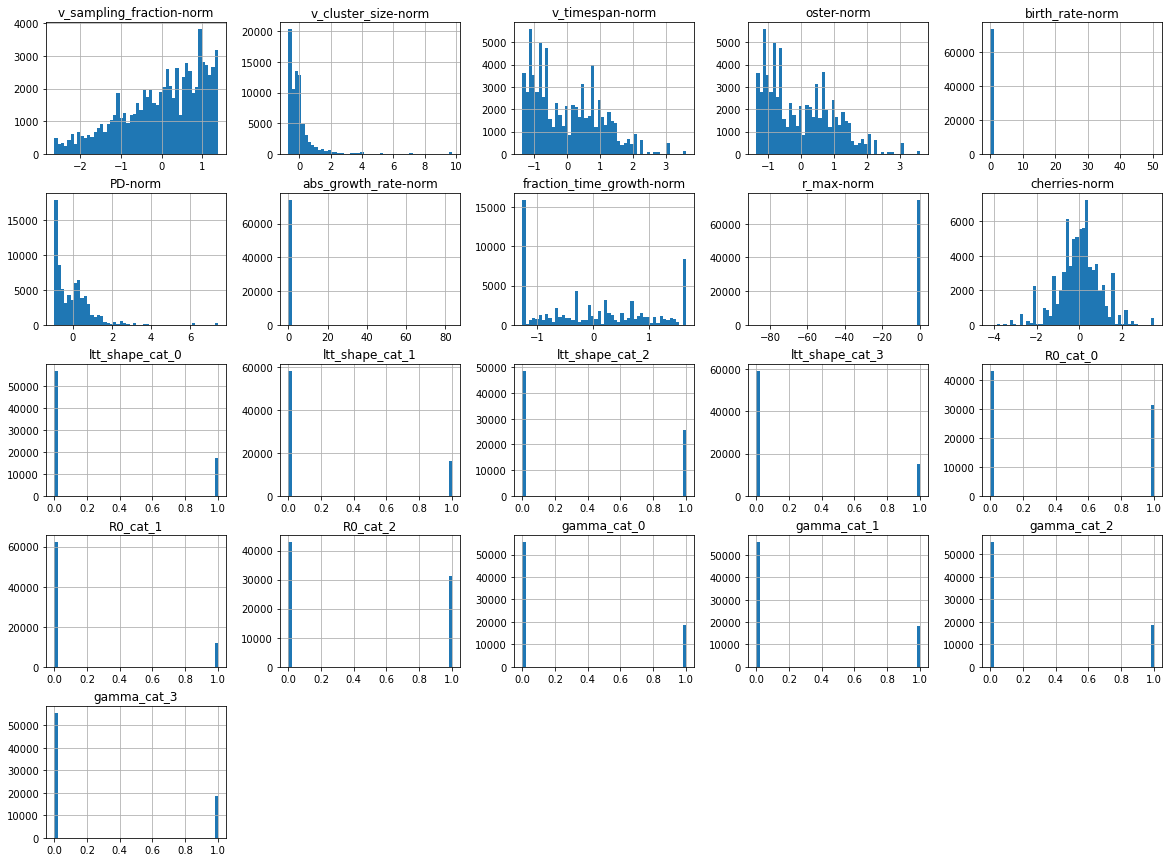

In [8]:
x_train.hist(bins=50,figsize=(20,15))

### Label distribution

Train:
static    73.037529
decay     17.572181
growth     9.390290
Name: dynamic, dtype: float64

Test:
static    73.062057
decay     16.378570
growth    10.559373
Name: dynamic, dtype: float64



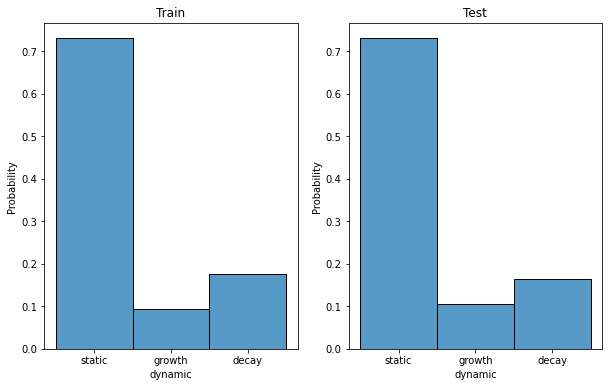

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

for i, (title, label_df) in enumerate(zip(['Train', 'Test'], [train_df['dynamic'], test_df['dynamic']])): 
    sns.histplot(label_df, bins='auto', stat="probability", ax=axs[i])
    axs[i].set_title(title)
    print(f'{title}:\n{label_df.value_counts(normalize=True) * 100}\n')

In [10]:
y_test.head()

0    2.0
1    2.0
2    2.0
3    2.0
4    2.0
Name: dynamic_cat, dtype: float64

### Cross-validation 

In [11]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold, cross_val_score, GroupKFold
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

n_folds = 5
print(f"CV: {n_folds}")

monitor_metric = 'f1_weighted'  # balanced_accuracy

# Set a seed for results reproduction
np.random.seed(0)

# Apply cross validation to select the best hyperparameters
# Note: cross validation split should work on the tree id, not node id.
# Incorrect: kf = KFold(n_folds,shuffle=True).split(x)

def cv_train(model, x, y):
    gkf = GroupKFold(n_splits=5).split(x_train, groups=treeid_train)
    cv_val = cross_val_score(model, x, y, scoring=monitor_metric, cv=gkf)
    return np.mean(cv_val)

CV: 5


In [47]:
model_folder = f'../checkpoints/{ds_name}/split_rs{split_rs}/models_norm_input'
os.makedirs(model_folder, exist_ok=True)

### Linear SVM model with SGD training.

In [14]:
from sklearn.linear_model import SGDClassifier

best_classifer = None
best_val = -1
best_stats = None

n_search = 10

# get random hyperparameters given arrays of potential values
def random_search_hyperparams(reg_values):
    reg = reg_values[np.random.randint(0,len(reg_values))]
    return reg

for i in range(n_search):
    # Given a set of potential values, increase the number of iterations
    reg = random_search_hyperparams([0.05, 0.1, 0.15, 1e-2, 1e-3, 1e-4])
    
    # Create a two-layer network
    classifer = SGDClassifier(loss='hinge', penalty='l1', alpha=reg, learning_rate='optimal', class_weight='balanced')
    
    # CV Train 
    cv_val = cv_train(classifer, x_train, y_train)
    
    # Save best values
    if cv_val > best_val:
        best_val = cv_val
        best_classifer = classifer
    
    # Print results
    print(f'lr: optimal, reg: {reg}, {monitor_metric}: {cv_val}')
print('best validation f1_weighted achieved: %f' % best_val)

lr: optimal, reg: 0.0001, f1_weighted: 0.7106316261727822
lr: optimal, reg: 0.15, f1_weighted: 0.6166542372582675
lr: optimal, reg: 0.01, f1_weighted: 0.7034408402667369
lr: optimal, reg: 0.05, f1_weighted: 0.6740326174287589
lr: optimal, reg: 0.15, f1_weighted: 0.6166542372582675
lr: optimal, reg: 0.05, f1_weighted: 0.6617522150975748
lr: optimal, reg: 0.0001, f1_weighted: 0.7042810974695577
lr: optimal, reg: 0.05, f1_weighted: 0.672460006929678
lr: optimal, reg: 0.05, f1_weighted: 0.6633151409760968


/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


lr: optimal, reg: 0.0001, f1_weighted: 0.7140759184275225
best validation f1_weighted achieved: 0.714076


In [15]:
best_classifer.fit(x_train, y_train)
y_test_pred_sgd_classifer = best_classifer.predict(x_test)
print(y_test_pred_sgd_classifer)

acc = accuracy_score(y_test, y_test_pred_sgd_classifer)
print(f'Test Acc: {acc}')

f1_weighted = f1_score(y_test, y_test_pred_sgd_classifer, average='weighted')
print(f'Test F1: {f1_weighted}')

[2. 2. 2. ... 0. 0. 0.]
Test Acc: 0.719239853983251
Test F1: 0.7089721509831584


In [16]:
print(best_classifer.coef_.shape)
enc_label = list(map(int, sorted(y_test.unique())))
print(enc_label)

coef_df = pd.DataFrame(best_classifer.coef_, index=enc_label, columns=input_feat)
coef_df.head()

(3, 21)
[0, 1, 2]


,v_sampling_fraction-norm,v_cluster_size-norm,v_timespan-norm,oster-norm,birth_rate-norm,PD-norm,abs_growth_rate-norm,fraction_time_growth-norm,r_max-norm,cherries-norm,...,ltt_shape_cat_1,ltt_shape_cat_2,ltt_shape_cat_3,R0_cat_0,R0_cat_1,R0_cat_2,gamma_cat_0,gamma_cat_1,gamma_cat_2,gamma_cat_3
0,0.084516,0.673762,-0.677032,0.0,0.359343,-1.043907,8.601815,-0.060549,7.491138,0.0,...,0.142316,0.000000,-0.192186,0.108464,0.0,-0.020474,-0.611613,-0.561544,1.489551,0.000000
1,0.107507,0.624495,0.609700,0.0,-0.041936,-1.904676,-177.321812,0.013275,181.257762,0.0,...,0.000000,-0.216354,-0.271694,-0.170053,0.0,-0.153592,-0.047809,0.000000,-0.162726,0.152392
2,-0.015479,-0.586589,0.137732,0.0,-0.103268,2.246871,-1.992023,-0.132907,-1.807081,0.0,...,0.000000,0.000000,0.169832,0.000000,0.0,0.298402,0.421059,0.387622,-1.007804,0.000000


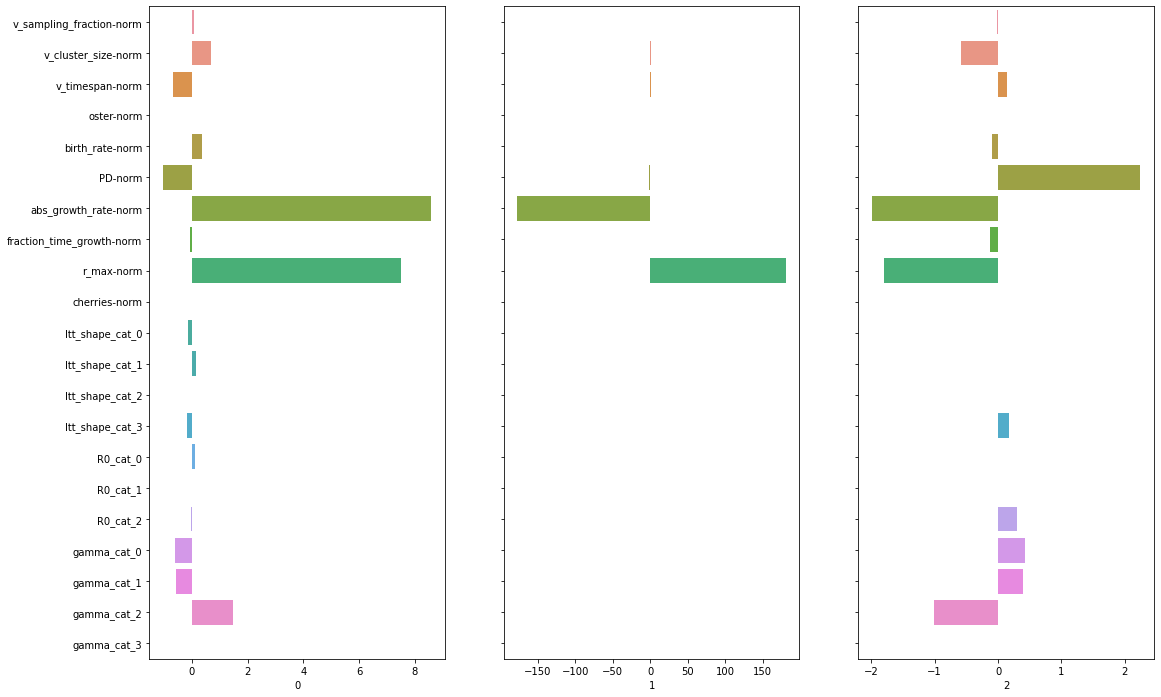

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(18, 12))
coef_ranked_dict = dict()

for i, label in enumerate(enc_label):
    coef = coef_df.iloc[label]
    coef_ranked_dict[label] = sorted(zip(input_feat, coef), key=lambda x: abs(x[1]), reverse=True)
    g = sns.barplot(y=input_feat, x=coef, ax=axs[i])
    if i != 0:
        g.set(yticklabels=[])  

In [18]:
coef_ranked_dict

{0: [('abs_growth_rate-norm', 8.601814797152791),
  ('r_max-norm', 7.491138095008737),
  ('gamma_cat_2', 1.4895506347370495),
  ('PD-norm', -1.0439067832218747),
  ('v_timespan-norm', -0.677032203788305),
  ('v_cluster_size-norm', 0.6737615059569877),
  ('gamma_cat_0', -0.6116132287535767),
  ('gamma_cat_1', -0.5615440759088536),
  ('birth_rate-norm', 0.3593425216284878),
  ('ltt_shape_cat_3', -0.19218572691152072),
  ('ltt_shape_cat_1', 0.14231555746967653),
  ('ltt_shape_cat_0', -0.1249127021720017),
  ('R0_cat_0', 0.10846442555184428),
  ('v_sampling_fraction-norm', 0.08451592368900382),
  ('fraction_time_growth-norm', -0.060548696680622224),
  ('R0_cat_2', -0.02047373579842243),
  ('oster-norm', 0.0),
  ('cherries-norm', 0.0),
  ('ltt_shape_cat_2', 0.0),
  ('R0_cat_1', 0.0),
  ('gamma_cat_3', 0.0)],
 1: [('r_max-norm', 181.2577622710373),
  ('abs_growth_rate-norm', -177.32181161225415),
  ('PD-norm', -1.9046755651463416),
  ('v_cluster_size-norm', 0.624495223276412),
  ('v_timespan

### Softmax regression

In [19]:
from sklearn.linear_model import LogisticRegression

best_classifer_softmax = None
best_val_softmax = -1
best_stats_softmax = None

n_search = 10

for i in range(n_search):
    # Given a set of potential values, increase the number of iterations
    reg = random_search_hyperparams([0.05, 0.1, 0.15, 1e-2, 1e-3, 1e-4])
    
    softmax_r = LogisticRegression(penalty='l2', C=1/reg, solver='liblinear',
                                   max_iter=100, class_weight='balanced')
    
    # CV Train 
    cv_val = cv_train(softmax_r, x_train, y_train)
    
    # Save best values
    if cv_val > best_val_softmax:
        best_val_softmax = cv_val
        best_classifer_softmax = softmax_r
    
    # Print results
    print(f'lr: optimal, reg: {reg}, {monitor_metric}: {cv_val}')
print('best validation f1_weighted achieved: %f' % best_val_softmax)

lr: optimal, reg: 0.15, f1_weighted: 0.7022992151386052


/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


lr: optimal, reg: 0.01, f1_weighted: 0.7066603634041984
lr: optimal, reg: 0.15, f1_weighted: 0.7022992151386052


/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


lr: optimal, reg: 0.01, f1_weighted: 0.7066603634041984


/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


lr: optimal, reg: 0.01, f1_weighted: 0.7066603634041984
lr: optimal, reg: 0.05, f1_weighted: 0.7019761780984842


/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


lr: optimal, reg: 0.01, f1_weighted: 0.7066603634041984
lr: optimal, reg: 0.05, f1_weighted: 0.7019761780984842
lr: optimal, reg: 0.15, f1_weighted: 0.7022992151386052
lr: optimal, reg: 0.05, f1_weighted: 0.7019761780984842
best validation f1_weighted achieved: 0.706660


In [20]:
# Add weight balance to the model, important to the model performance
best_classifer_softmax.fit(x_train, y_train)
y_test_pred_softmax = best_classifer_softmax.predict(x_test)

print(y_test_pred_softmax)

acc = accuracy_score(y_test, y_test_pred_softmax)
print(f'Test Acc: {acc}')

f1_weighted = f1_score(y_test, y_test_pred_softmax, average='weighted')
print(f'Test F1: {f1_weighted}')

[2. 2. 2. ... 0. 0. 0.]
Test Acc: 0.669637105432682
Test F1: 0.6958099069259406


In [21]:
print(best_classifer_softmax.coef_.shape)
enc_label = list(map(int, sorted(y_test.unique())))
print(enc_label)

coef_df_softmax = pd.DataFrame(best_classifer_softmax.coef_, index=enc_label, columns=input_feat)
coef_df_softmax.head()

(3, 21)
[0, 1, 2]


,v_sampling_fraction-norm,v_cluster_size-norm,v_timespan-norm,oster-norm,birth_rate-norm,PD-norm,abs_growth_rate-norm,fraction_time_growth-norm,r_max-norm,cherries-norm,...,ltt_shape_cat_1,ltt_shape_cat_2,ltt_shape_cat_3,R0_cat_0,R0_cat_1,R0_cat_2,gamma_cat_0,gamma_cat_1,gamma_cat_2,gamma_cat_3
0,0.196933,0.633917,-86.961512,85.619363,0.251880,-0.943468,123.148426,-0.017018,117.430987,-0.018399,...,-0.070621,-0.180318,-0.251710,0.012270,-0.251722,-0.371448,-0.992128,-0.937527,1.600786,-0.282032
1,0.119981,1.314341,147.780043,-146.856332,-0.159587,-4.486134,-15.861275,0.155278,-15.085271,0.043729,...,-0.205715,-0.405124,-0.594257,-0.606259,-0.176504,-0.451099,-0.352860,-0.153072,-0.895272,0.167341
2,-0.159852,-0.848005,10.725388,-10.189674,-0.164826,2.246053,-76.164111,-0.073972,-72.633163,0.015026,...,-0.060644,0.100008,0.286157,-0.029976,0.026354,0.251377,0.780703,0.658810,-1.275107,0.083348


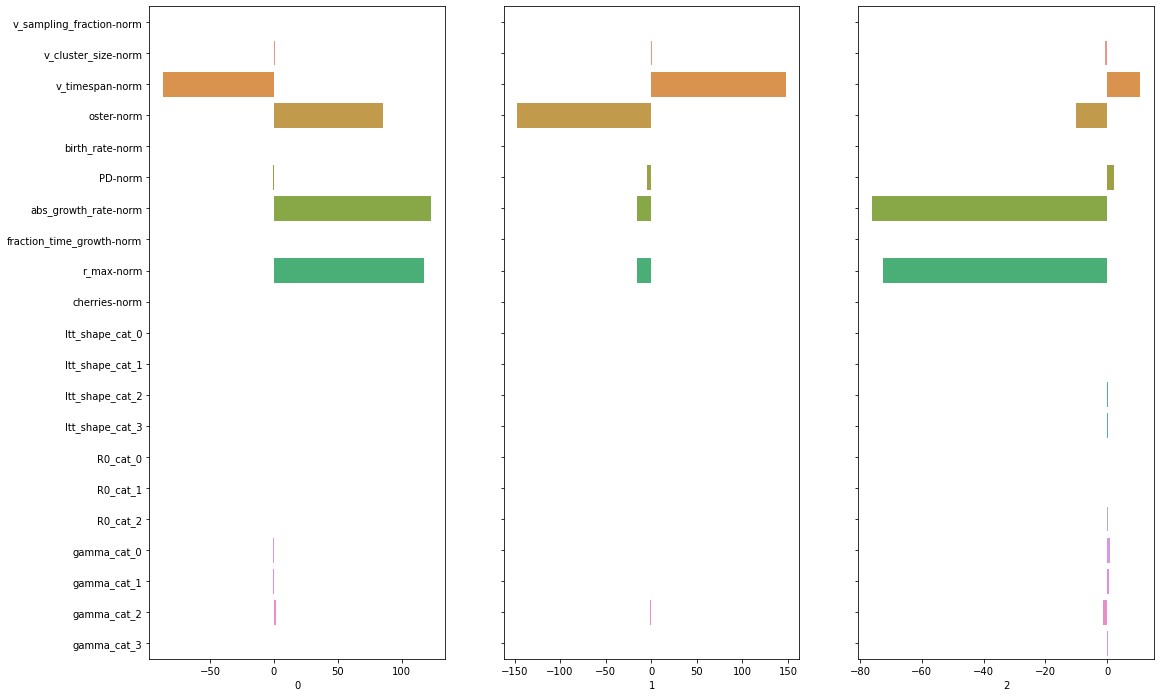

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(18, 12))
coef_ranked_dict_softmax = dict()

for i, label in enumerate(enc_label):
    coef = coef_df_softmax.iloc[label]
    coef_ranked_dict_softmax[label] = sorted(zip(input_feat, coef), key=lambda x: abs(x[1]), reverse=True)
    g = sns.barplot(y=input_feat, x=coef, ax=axs[i])
    if i != 0:
        g.set(yticklabels=[])  

In [23]:
coef_ranked_dict_softmax

{0: [('abs_growth_rate-norm', 123.14842550805807),
  ('r_max-norm', 117.43098652726529),
  ('v_timespan-norm', -86.96151183231986),
  ('oster-norm', 85.61936295619998),
  ('gamma_cat_2', 1.6007864587845215),
  ('gamma_cat_0', -0.9921276539412376),
  ('PD-norm', -0.943468407170067),
  ('gamma_cat_1', -0.9375270519520078),
  ('v_cluster_size-norm', 0.6339174986241223),
  ('R0_cat_2', -0.3714476747369151),
  ('gamma_cat_3', -0.28203232384067206),
  ('birth_rate-norm', 0.25187977493622904),
  ('R0_cat_1', -0.2517224831651909),
  ('ltt_shape_cat_3', -0.251709855809447),
  ('v_sampling_fraction-norm', 0.19693266569128975),
  ('ltt_shape_cat_2', -0.18031759915464823),
  ('ltt_shape_cat_0', -0.10825244561911013),
  ('ltt_shape_cat_1', -0.07062066303742112),
  ('cherries-norm', -0.0183993274173002),
  ('fraction_time_growth-norm', -0.01701787644570503),
  ('R0_cat_0', 0.01226961498446202)],
 1: [('v_timespan-norm', 147.78004322125736),
  ('oster-norm', -146.85633217031108),
  ('abs_growth_rate-

### Random Forest

In [24]:
# Set a seed for results reproduction
np.random.seed(0)
max_depths = [10, 20, 25, 30, None]

# get random hyperparameters given arrays of potential values
def rf_random_search_hyperparams():
    hp_dict = {}
    
    hp_dict['n_estimators'] = np.random.choice([50, 70, 100, 120, 140])
    hp_dict['max_depth'] = max_depths[np.random.randint(len(max_depths))]
    hp_dict['min_samples_split'] = np.random.randint(2, 5)
    hp_dict['min_samples_leaf'] = np.random.randint(1, 3)
    hp_dict['max_features'] = np.random.choice(['auto', 'sqrt', 'log2'])
    
    return hp_dict

In [25]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(0)
best_classifer_rf = None
best_val_rf = -1

n_search = 30

for i in range(n_search):
    # Given a set of potential values, increase the number of iterations
    hp_dict = rf_random_search_hyperparams()
    
    rf = RandomForestClassifier(n_estimators=hp_dict['n_estimators'], criterion='gini', 
                                max_depth=hp_dict['max_depth'],
                                min_samples_split=hp_dict['min_samples_split'], 
                                min_samples_leaf=hp_dict['min_samples_leaf'],
                                class_weight='balanced')
    
    # CV Train 
    cv_val = cv_train(rf, x_train, y_train)
    
    # Save best values
    if cv_val > best_val_rf:
        best_val_rf = cv_val
        best_classifer_rf = rf
    
    # Print results
    print(f'Dict: {hp_dict}, {monitor_metric}: {cv_val}')
print('best validation f1_weighted achieved: %f' % best_val_rf)

Dict: {'n_estimators': 140, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt'}, f1_weighted: 0.7388852932979484
Dict: {'n_estimators': 70, 'max_depth': 30, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt'}, f1_weighted: 0.7882545650713447
Dict: {'n_estimators': 120, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto'}, f1_weighted: 0.7875773314373842
Dict: {'n_estimators': 140, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'auto'}, f1_weighted: 0.7851174636532694
Dict: {'n_estimators': 70, 'max_depth': None, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'auto'}, f1_weighted: 0.785597731708897
Dict: {'n_estimators': 140, 'max_depth': 30, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt'}, f1_weighted: 0.7865642514592546
Dict: {'n_estimators': 100, 'max_depth': 30, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features

In [26]:
best_classifer_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 25,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [27]:
# Add weight balance to the model, important to the model performance
best_classifer_rf.fit(x_train, y_train)
y_test_pred_rf = best_classifer_rf.predict(x_test)

print(y_test_pred_rf)

acc = accuracy_score(y_test, y_test_pred_rf)
print(f'Test Acc: {acc}')

f1_weighted = f1_score(y_test, y_test_pred_rf, average='weighted')
print(f'Test F1: {f1_weighted}')

[2. 2. 2. ... 2. 2. 2.]
Test Acc: 0.8241893923126477
Test F1: 0.7900428152102145


[('PD-norm', 0.13036263003443652), ('oster-norm', 0.1266510153741623), ('v_cluster_size-norm', 0.11500836074957252), ('abs_growth_rate-norm', 0.09537689423276896), ('r_max-norm', 0.0938344104963776), ('v_timespan-norm', 0.09338177306900082), ('birth_rate-norm', 0.0832644165128737), ('v_sampling_fraction-norm', 0.06554833291938006), ('cherries-norm', 0.04811121174694655), ('gamma_cat_2', 0.04379040352059488), ('fraction_time_growth-norm', 0.02918712319223476), ('R0_cat_0', 0.01007191925639072), ('R0_cat_2', 0.009040246227380129), ('ltt_shape_cat_3', 0.008548232311510804), ('gamma_cat_3', 0.008103602906475271), ('gamma_cat_0', 0.007711798417940865), ('gamma_cat_1', 0.007437181063346709), ('ltt_shape_cat_2', 0.006551787221761878), ('ltt_shape_cat_1', 0.006507671578565331), ('R0_cat_1', 0.005762389211331543), ('ltt_shape_cat_0', 0.005748599956948169)]


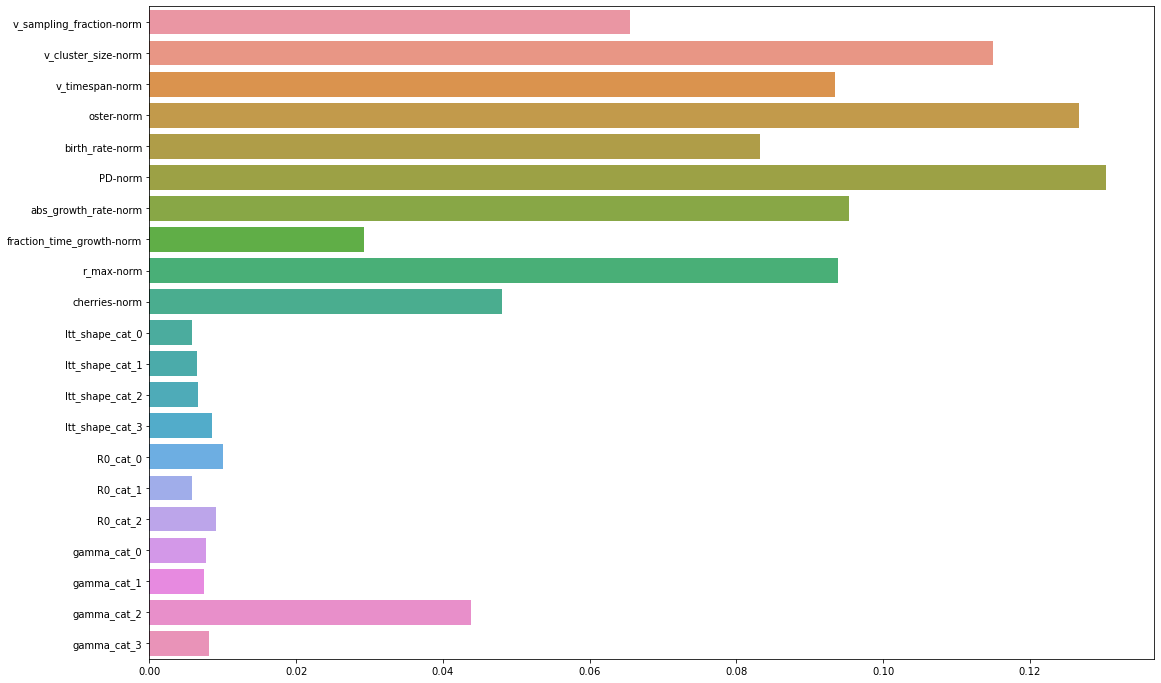

In [28]:
fig, axs = plt.subplots(figsize=(18, 12))

coef_ranked_dict_rf = dict()

# Gini importance: The higher, the more important the feature. 
# The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. 
rf_coef = best_classifer_rf.feature_importances_

coef_ranked = sorted(zip(input_feat, rf_coef), key=lambda x: abs(x[1]), reverse=True)
sns.barplot(y=input_feat, x=rf_coef)
print(coef_ranked)

### ROC for multi-class

In [37]:
# Onehot the label
from sklearn.preprocessing import label_binarize

classes = np.unique(y_train)
n_classes = len(classes)
label_encode_dict = feat_desc['dynamic']

y_test_onehot = label_binarize(y_test, classes=classes)

y_test_predscore_rf = best_classifer_rf.predict_proba(x_test)
y_test_predscore_rf

array([[0.06, 0.02, 0.92],
       [0.06, 0.02, 0.92],
       [0.06, 0.02, 0.92],
       ...,
       [0.32, 0.24, 0.44],
       [0.32, 0.24, 0.44],
       [0.32, 0.24, 0.44]])

In [39]:
from sklearn.metrics import auc, roc_auc_score, roc_curve

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], y_test_predscore_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
# Micro-average: Calculate metrics globally by considering each element of the label indicator matrix as a label.
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_onehot.ravel(), y_test_predscore_rf.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [40]:
roc_auc

{0: 0.9297012207801941,
 1: 0.7504120033246485,
 2: 0.8537118833624374,
 'micro': 0.9306023413372284}

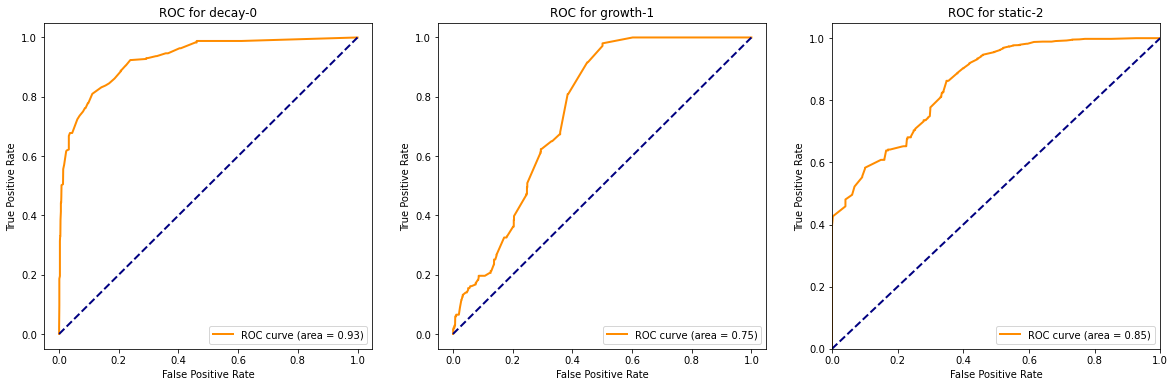

In [41]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
lw = 2

for i, class_id in enumerate(range(n_classes)):
    ax = axs[i]
    ax.plot(fpr[class_id], tpr[class_id], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[class_id])
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC for {label_encode_dict[str(class_id)]}-{class_id}')
    ax.legend(loc="lower right")

### Plot ROC curves for the multilabel

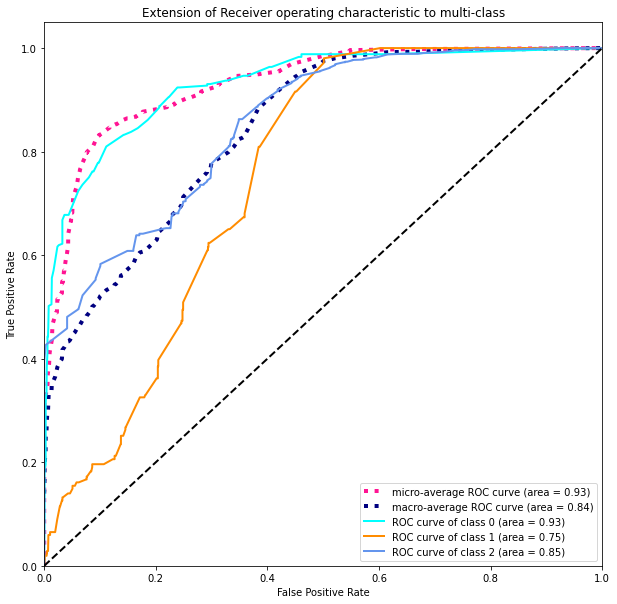

In [42]:
from numpy import interp
from itertools import cycle

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

# Calculate metrics for each label, and find their unweighted mean (by linear interpolation). 
# This does not take label imbalance into account.
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

### Calculate AUC
* 'ovr':
Stands for One-vs-rest. Computes the AUC of each class against the rest. This treats the multiclass case in the same way as the multilabel case. Sensitive to class imbalance even when average == 'macro', because class imbalance affects the composition of each of the ‘rest’ groupings.

* 'ovo':
Stands for One-vs-one. Computes the average AUC of **all possible pairwise combinations of classes** (3 combinations). Insensitive to class imbalance when average == 'macro'.

In [43]:
macro_roc_auc_ovo = roc_auc_score(y_test_onehot, y_test_predscore_rf, multi_class="ovo",
                                  average="macro")
# 'weighted': Calculate metrics for each label, and find their average, 
# weighted by support (the number of true instances for each label).
weighted_roc_auc_ovo = roc_auc_score(y_test_onehot, y_test_predscore_rf, multi_class="ovo",
                                     average="weighted") 
macro_roc_auc_ovr = roc_auc_score(y_test_onehot, y_test_predscore_rf, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test_onehot, y_test_predscore_rf, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.844608 (macro),
0.855250 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.844608 (macro),
0.855250 (weighted by prevalence)


### XGBoost

In [56]:
# Set a seed for results reproduction
np.random.seed(0)
learning_rates = [0.1, 0.3, 0.5, 0.7, 0.8, 1.0]
max_depths = [3, 6, 10, 12, 15]
lambdas = [0.0, 0.5, 1.0, 2.0, 3.0]

# get random hyperparameters given arrays of potential values
def xgb_random_search_hyperparams():
    hp_dict = {}
    
    hp_dict['learning_rate'] = learning_rates[np.random.randint(len(learning_rates))]
    hp_dict['subsample'] = (-0.5) * np.random.rand() + 0.5    # (0.5, 1]
    hp_dict['lambda'] = lambdas[np.random.randint(len(lambdas))]
    hp_dict['max_depth'] = max_depths[np.random.randint(len(max_depths))]
    hp_dict['lambda'] = lambdas[np.random.randint(len(lambdas))]
    
    
    return hp_dict

print(np.unique(y_train.values))

[0. 1. 2.]


In [57]:
from xgboost import XGBClassifier, XGBRFClassifier
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

np.random.seed(0)
best_classifer_xgb = None
best_val_xgb = -1

n_search = 30

for i in range(n_search):
    # Given a set of potential values, increase the number of iterations
    hp_dict = xgb_random_search_hyperparams()
    
    xgb = XGBRFClassifier(objective="multi:softprob")
    
    # CV Train 
    cv_val = cv_train(xgb, x_train, y_train)
    
    # Save best values
    if cv_val > best_val_xgb:
        best_val_xgb = cv_val
        best_classifer_xgb = xgb
    
    # Print results
    print(f'Search: {i}, Dict: {hp_dict}, {monitor_metric}: {cv_val}')
print('best validation f1_weighted achieved: %f' % best_val_xgb)

/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:18:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:18:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:18:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:18:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:18:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:18:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:18:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:18:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:19:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:19:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:19:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:19:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:19:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:19:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:19:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:19:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:19:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:19:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:19:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:20:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:20:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:20:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:20:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:20:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:20:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:20:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:20:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:20:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:21:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:21:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:21:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:21:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:21:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:21:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:21:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:21:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:21:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:21:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:21:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:22:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:22:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:22:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:22:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:22:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:22:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:22:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:22:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:22:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:23:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:23:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:23:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:23:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:23:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:23:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:23:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:23:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:23:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:23:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:23:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:24:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:24:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:25:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:25:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:25:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:26:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:26:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:26:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:26:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:26:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:26:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:26:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:26:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:26:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:26:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:27:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:27:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:28:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:28:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:28:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:28:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:28:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:28:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:28:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:28:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:28:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:28:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:29:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:29:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:29:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:29:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:29:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:29:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:29:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/yanjun/anaconda3/envs/pyt-1.1/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:29:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:29:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:29:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:30:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

In [58]:
# Add weight balance to the model, important to the model performance
best_classifer_xgb.fit(x_train, y_train)
y_test_pred_xgb = best_classifer_xgb.predict(x_test)

print(y_test_pred_xgb)

acc = accuracy_score(y_test, y_test_pred_xgb)
print(f'Test Acc: {acc}')

f1_weighted = f1_score(y_test, y_test_pred_xgb, average='weighted')
print(f'Test F1: {f1_weighted}')

[21:30:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[2. 2. 2. ... 2. 2. 2.]
Test Acc: 0.8157075370410135
Test F1: 0.7736775462664441


[('PD-norm', 0.14211343), ('v_timespan-norm', 0.09557483), ('abs_growth_rate-norm', 0.08998096), ('oster-norm', 0.08847291), ('gamma_cat_2', 0.084752016), ('ltt_shape_cat_0', 0.08377532), ('v_cluster_size-norm', 0.083544806), ('birth_rate-norm', 0.041374467), ('ltt_shape_cat_3', 0.03619979), ('ltt_shape_cat_1', 0.028380591), ('fraction_time_growth-norm', 0.027934346), ('r_max-norm', 0.026774468), ('v_sampling_fraction-norm', 0.02601817), ('R0_cat_1', 0.025767896), ('cherries-norm', 0.023732383), ('ltt_shape_cat_2', 0.021142678), ('gamma_cat_0', 0.019479178), ('R0_cat_2', 0.017306782), ('R0_cat_0', 0.013179871), ('gamma_cat_1', 0.013080821), ('gamma_cat_3', 0.011414235)]


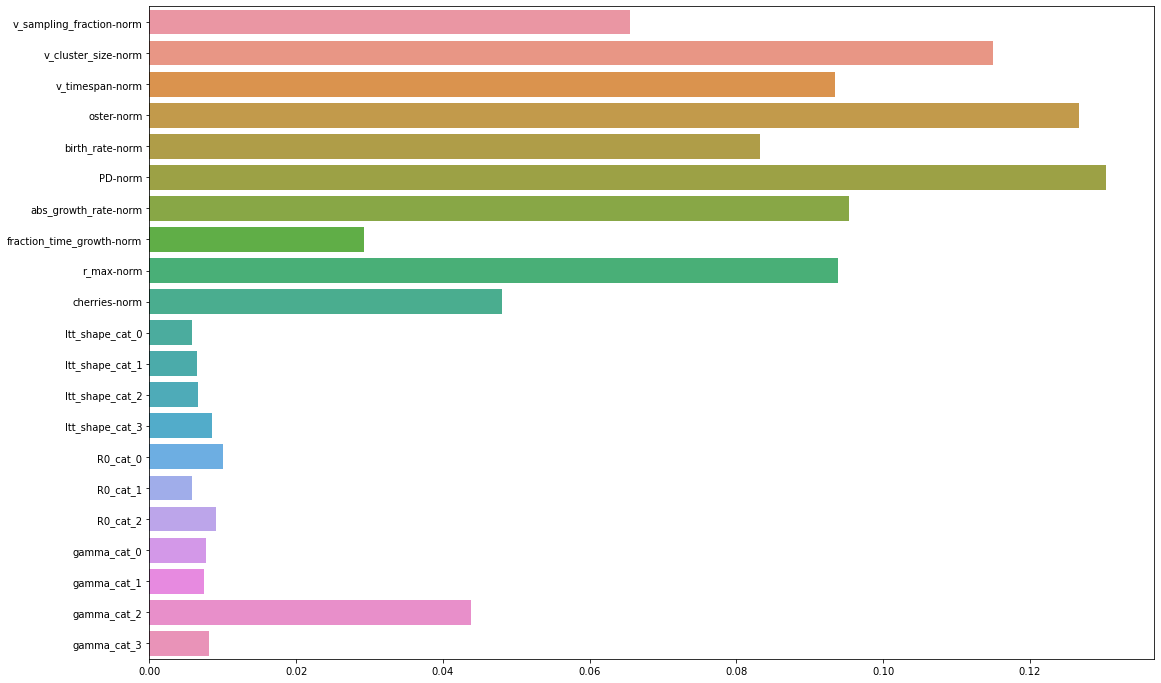

In [59]:
fig, axs = plt.subplots(figsize=(18, 12))

coef_ranked_dict_xgb = dict()

xgb_coef = best_classifer_xgb.feature_importances_

coef_ranked = sorted(zip(input_feat, xgb_coef), key=lambda x: abs(x[1]), reverse=True)
sns.barplot(y=input_feat, x=rf_coef)
print(coef_ranked)

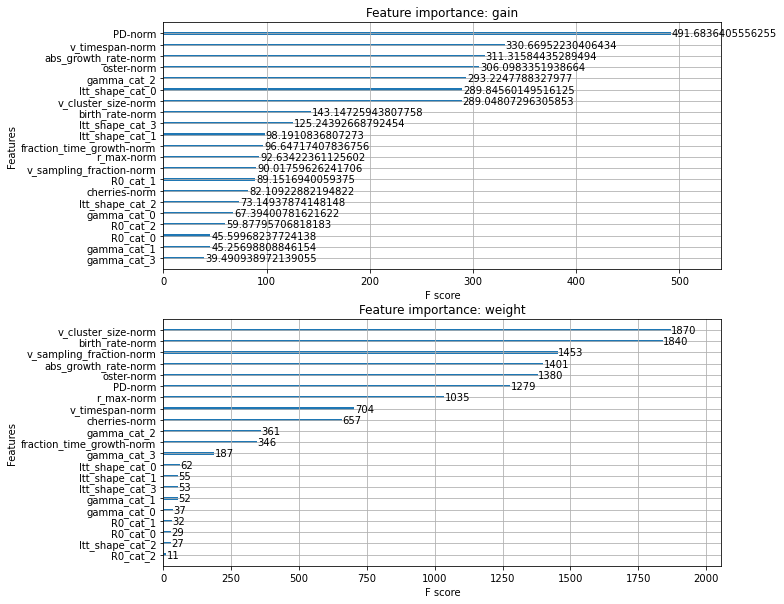

In [60]:
from xgboost import plot_importance, plot_tree

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Feature importance type: 
# "gain" is the average gain of splits which use the feature
# "weight" is the number of times a feature appears in a tree

for i, impt_type in enumerate(['gain', 'weight']): 
    plot_importance(best_classifer_xgb, importance_type=impt_type, ax=axs[i])
    axs[i].set_title(f'Feature importance: {impt_type}')

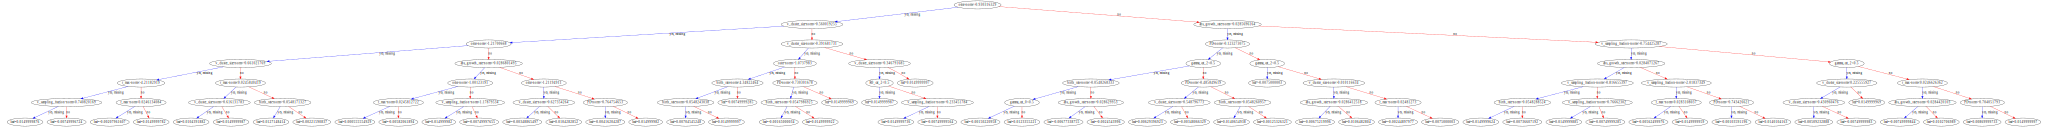

In [61]:
from xgboost import to_graphviz

graph = to_graphviz(best_classifer_xgb)

xgb_folder = osp.join(model_folder, 'xgb')
os.makedirs(xgb_folder, exist_ok=True)

graph.view(osp.join(xgb_folder, 'xgb'), cleanup=True)
graph